In [19]:
#IMPORTS
%run Functions.ipynb
%run ../datuslib.ipynb
import pandas as pd
import string
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce

from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [20]:
#context.save("pred")

In [21]:
#to_predict = pd.read_csv("../Data/test.csv")

#context = Context(data = to_predict)
#to_predict = to_predict.copy().fillna(' ')
#to_predict['negativity'] = to_predict.apply(lambda row : getTweetNegativity(row,context), axis = 1)
#to_predict.to_csv('tweets_con_negatividad_to_predict.csv')

In [22]:
#CARGA DATA
#negativity = pd.read_csv("../../TP1/Axel/tweets_con_negatividad.csv")
train = pd.read_csv("train_ngr_2.csv")
#train["negativity"] = negativity["negativity"]/100

#negativity = pd.read_csv("tweets_con_negatividad_to_predict.csv")
to_predict = pd.read_csv("test_ngr_2.csv")

#to_predict["negativity"] = negativity["negativity"]/100

#features(train, to_predict)

#binary(train, to_predict)

In [23]:
archivo = open("NW.txt", "r")
for linea in archivo.readlines():
    train.drop(columns = ["Tiene_"+str(linea[:-1])], axis=1,inplace = True)
    to_predict.drop(columns = ["Tiene_"+str(linea[:-1])], axis=1,inplace = True)
archivo.close()


train.drop(columns=["Unnamed: 0","feature"], axis=1,inplace = True)
to_predict.drop(columns=["Unnamed: 0","feature"], axis=1,inplace = True)
train

,id,keyword,location,text,target,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,Kindex,key_bit0,key_bit1,key_bit2,key_bit3,key_bit4,key_bit5,key_bit6,key_bit7,1-gram-1,2-gram-1,3-gram-1,1-gram-0,2-gram-0,3-gram-0,sentimiento
0,1,NaN,NaN,our deeds are reason earthquake may allah forg...,1,0.246429,0.240741,13,False,4.384615,1,0,0,0,0,0,0,0,0,0,0,758,11,7,977,0,0,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0.135714,0.129630,7,False,4.571429,0,0,0,0,0,0,0,0,0,0,0,580,15,5,502,3,0,1
2,5,NaN,NaN,residents asked shelter in place are being not...,1,0.475000,0.407407,20,False,5.090909,0,0,0,0,0,0,0,0,0,0,0,2488,25,16,2486,3,0,1
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,0.232143,0.166667,8,False,7.125000,1,0,0,0,0,0,0,0,0,0,0,2109,32,5,1477,0,0,1
4,7,NaN,NaN,just got sent photo from ruby alaska smoke fro...,1,0.314286,0.314815,15,False,4.500000,2,0,0,0,0,0,0,0,0,0,0,2838,20,11,2582,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1,0.296429,0.203704,11,True,6.636364,0,0,0,0,0,0,0,0,0,0,0,2229,93,73,1633,3,0,1
7609,10870,NaN,NaN,ariaahrary thetawniest out control wild fires ...,1,0.446429,0.370370,17,False,5.300000,0,2,0,0,0,0,0,0,0,0,0,2370,96,32,2006,6,0,1
7610,10871,NaN,NaN,s volcano hawaii,1,0.232143,0.148148,8,True,7.250000,0,0,0,0,0,0,0,0,0,0,0,342,20,10,453,1,0,0
7611,10872,NaN,NaN,police investigating after ebike collided with...,1,0.489286,0.351852,19,False,6.263158,0,0,0,0,0,0,0,0,0,0,0,2482,51,30,2387,13,0,1


In [24]:
to_predict

,id,keyword,location,text,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,Kindex,key_bit0,key_bit1,key_bit2,key_bit3,key_bit4,key_bit5,key_bit6,key_bit7,1-gram-1,2-gram-1,3-gram-1,1-gram-0,2-gram-0,3-gram-0,sentimiento
0,0,NaN,NaN,just happened terrible car crash,0.121429,0.176471,6,False,4.833333,0,0,0,0,0,0,0,0,0,0,0,618,1,0,695,1,0,1
1,2,NaN,NaN,heard about earthquake different cities stay s...,0.228571,0.264706,9,False,6.222222,1,0,0,0,0,0,0,0,0,0,0,719,9,1,1156,4,0,0
2,3,NaN,NaN,there forest fire spot pond geese are fleeing ...,0.342857,0.558824,19,False,4.105263,0,0,0,0,0,0,0,0,0,0,0,2394,16,0,2549,5,0,1
3,9,NaN,NaN,apocalypse lighting spokane wildfires,0.142857,0.117647,4,False,9.250000,2,0,0,0,0,0,0,0,0,0,0,1812,0,0,1302,0,0,1
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan,0.160714,0.235294,8,False,4.750000,0,0,0,0,0,0,0,0,0,0,0,2054,39,0,2120,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles safety faste...,0.196429,0.235294,7,False,6.000000,0,0,0,0,0,0,0,0,0,0,0,386,4,0,445,3,0,1
3259,10865,NaN,NaN,storm in ri worse than last hurricane my harde...,0.496429,0.676471,22,False,5.086957,0,0,0,0,0,0,0,0,0,0,0,2719,37,17,3467,28,0,1
3260,10868,NaN,NaN,green line derailment in chicago,0.196429,0.176471,6,True,8.333333,0,0,0,0,0,0,0,0,0,0,0,1467,10,2,1148,0,0,1
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo,0.232143,0.205882,7,True,8.428571,0,0,0,0,0,0,0,0,0,0,0,715,30,23,980,12,4,1


### Features y Encoder

In [25]:
train.fillna("nothing", inplace= True)

keyword_in_text(train)

train.drop(columns=["id"], axis=1,inplace = True)

train.drop(columns=["location"], axis=1,inplace = True)

train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')

train["keyword"]=(train.keyword.map(lambda x: (x.lower())))

train.drop(columns=["text"], axis=1,inplace = True)

train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
#| (train["keyword"] == "outbreak") | (train["keyword"] == "oil split")\
#| (train["keyword"] == "typhoon") | (train["keyword"] == "suicide bombing") | (train["keyword"] == "suicide bomber")

train["Tiene_key_no_impor"] = (train["keyword"] == "aftershock")



from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

train.drop(columns=["Kindex"], axis=1,inplace = True)
train["keyword"] = train["keyword"]/train["keyword"].max()

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
x = train[train.columns.drop("target")]
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(f"Original shapes: X={x.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")

Original shapes: X=(7613, 26) y=(7613,)
Train shapes: X=(6090, 26) y=(6090,)
Test  shapes: X=(1523, 26)  y=(1523,)


### Completo Features

In [27]:
to_predict.fillna("Nothing", inplace= True)
keyword_in_text(to_predict)

ids = to_predict["id"]

to_predict.drop(columns=["id"], axis=1,inplace = True)
to_predict.drop(columns=["location"], axis=1,inplace = True)

to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')

to_predict["keyword"]=(to_predict.keyword.map(lambda x: (x.lower())))

#importance(to_predict)
to_predict.drop(columns=["text"], axis=1,inplace = True)



to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris")\
| (to_predict["keyword"] == "derailment")
#| (to_predict["keyword"] == "outbreak")\
#| (to_predict["keyword"] == "oil split") | (to_predict["keyword"] == "typhoon") \
#| (to_predict["keyword"] == "suicide bombing") | (to_predict["keyword"] == "suicide bomber")

to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "aftershock")

# Categorical boolean mask
categorical_feature_mask = to_predict.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = to_predict.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
to_predict[categorical_cols] = to_predict[categorical_cols].apply(lambda col: le.fit_transform(col))

to_predict.drop(columns=["Kindex"], axis=1,inplace = True)
to_predict["keyword"] = to_predict["keyword"]/to_predict["keyword"].max()

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Fit Catboost

In [36]:
model = CatBoostClassifier()
model.fit(x_train, y_train)

Learning rate set to 0.022283
0:	learn: 0.6445072	total: 5.36ms	remaining: 5.36s
1:	learn: 0.5838815	total: 10.5ms	remaining: 5.26s
2:	learn: 0.5311775	total: 15.8ms	remaining: 5.26s
3:	learn: 0.4847199	total: 32.9ms	remaining: 8.18s
4:	learn: 0.4389638	total: 38.1ms	remaining: 7.59s
5:	learn: 0.4026099	total: 44.3ms	remaining: 7.34s
6:	learn: 0.3765364	total: 50.5ms	remaining: 7.17s
7:	learn: 0.3487886	total: 56.9ms	remaining: 7.05s
8:	learn: 0.3271383	total: 63.5ms	remaining: 6.99s
9:	learn: 0.3114341	total: 69.1ms	remaining: 6.84s
10:	learn: 0.2859630	total: 75.1ms	remaining: 6.76s
11:	learn: 0.2697947	total: 81ms	remaining: 6.67s
12:	learn: 0.2539847	total: 86.5ms	remaining: 6.56s
13:	learn: 0.2358017	total: 92ms	remaining: 6.48s
14:	learn: 0.2183970	total: 97.7ms	remaining: 6.42s
15:	learn: 0.2059706	total: 108ms	remaining: 6.63s
16:	learn: 0.1956654	total: 114ms	remaining: 6.58s
17:	learn: 0.1828407	total: 119ms	remaining: 6.51s
18:	learn: 0.1708344	total: 125ms	remaining: 6.47s


184:	learn: 0.0499890	total: 1.23s	remaining: 5.43s
185:	learn: 0.0499313	total: 1.24s	remaining: 5.42s
186:	learn: 0.0499226	total: 1.25s	remaining: 5.41s
187:	learn: 0.0499070	total: 1.25s	remaining: 5.4s
188:	learn: 0.0498760	total: 1.26s	remaining: 5.39s
189:	learn: 0.0498440	total: 1.26s	remaining: 5.38s
190:	learn: 0.0497957	total: 1.27s	remaining: 5.38s
191:	learn: 0.0497107	total: 1.27s	remaining: 5.37s
192:	learn: 0.0496653	total: 1.28s	remaining: 5.36s
193:	learn: 0.0496182	total: 1.29s	remaining: 5.34s
194:	learn: 0.0496039	total: 1.29s	remaining: 5.33s
195:	learn: 0.0495761	total: 1.3s	remaining: 5.33s
196:	learn: 0.0494742	total: 1.31s	remaining: 5.33s
197:	learn: 0.0494341	total: 1.31s	remaining: 5.32s
198:	learn: 0.0493035	total: 1.32s	remaining: 5.31s
199:	learn: 0.0492699	total: 1.32s	remaining: 5.3s
200:	learn: 0.0491614	total: 1.34s	remaining: 5.32s
201:	learn: 0.0491526	total: 1.34s	remaining: 5.3s
202:	learn: 0.0490175	total: 1.35s	remaining: 5.29s
203:	learn: 0.04

368:	learn: 0.0427256	total: 2.45s	remaining: 4.19s
369:	learn: 0.0426937	total: 2.46s	remaining: 4.18s
370:	learn: 0.0426614	total: 2.46s	remaining: 4.17s
371:	learn: 0.0426546	total: 2.47s	remaining: 4.17s
372:	learn: 0.0426399	total: 2.47s	remaining: 4.16s
373:	learn: 0.0426083	total: 2.48s	remaining: 4.15s
374:	learn: 0.0425944	total: 2.49s	remaining: 4.14s
375:	learn: 0.0425068	total: 2.49s	remaining: 4.14s
376:	learn: 0.0424848	total: 2.52s	remaining: 4.17s
377:	learn: 0.0424710	total: 2.53s	remaining: 4.16s
378:	learn: 0.0424395	total: 2.53s	remaining: 4.15s
379:	learn: 0.0423839	total: 2.54s	remaining: 4.14s
380:	learn: 0.0423541	total: 2.54s	remaining: 4.13s
381:	learn: 0.0423330	total: 2.55s	remaining: 4.13s
382:	learn: 0.0423153	total: 2.56s	remaining: 4.12s
383:	learn: 0.0422567	total: 2.56s	remaining: 4.11s
384:	learn: 0.0422148	total: 2.57s	remaining: 4.1s
385:	learn: 0.0421954	total: 2.57s	remaining: 4.09s
386:	learn: 0.0421550	total: 2.58s	remaining: 4.09s
387:	learn: 0

529:	learn: 0.0383474	total: 3.5s	remaining: 3.11s
530:	learn: 0.0383419	total: 3.52s	remaining: 3.11s
531:	learn: 0.0383273	total: 3.52s	remaining: 3.1s
532:	learn: 0.0383122	total: 3.53s	remaining: 3.09s
533:	learn: 0.0382791	total: 3.54s	remaining: 3.09s
534:	learn: 0.0382550	total: 3.54s	remaining: 3.08s
535:	learn: 0.0382224	total: 3.55s	remaining: 3.07s
536:	learn: 0.0382020	total: 3.55s	remaining: 3.06s
537:	learn: 0.0381737	total: 3.56s	remaining: 3.06s
538:	learn: 0.0381424	total: 3.56s	remaining: 3.05s
539:	learn: 0.0381174	total: 3.57s	remaining: 3.04s
540:	learn: 0.0381093	total: 3.58s	remaining: 3.03s
541:	learn: 0.0380810	total: 3.58s	remaining: 3.03s
542:	learn: 0.0380683	total: 3.59s	remaining: 3.02s
543:	learn: 0.0380481	total: 3.59s	remaining: 3.01s
544:	learn: 0.0380356	total: 3.6s	remaining: 3s
545:	learn: 0.0379479	total: 3.6s	remaining: 3s
546:	learn: 0.0379205	total: 3.61s	remaining: 2.99s
547:	learn: 0.0379050	total: 3.62s	remaining: 2.98s
548:	learn: 0.0378866	

709:	learn: 0.0342603	total: 4.73s	remaining: 1.93s
710:	learn: 0.0342285	total: 4.74s	remaining: 1.93s
711:	learn: 0.0342238	total: 4.75s	remaining: 1.92s
712:	learn: 0.0342141	total: 4.75s	remaining: 1.91s
713:	learn: 0.0342089	total: 4.76s	remaining: 1.91s
714:	learn: 0.0341946	total: 4.76s	remaining: 1.9s
715:	learn: 0.0341624	total: 4.77s	remaining: 1.89s
716:	learn: 0.0341180	total: 4.77s	remaining: 1.88s
717:	learn: 0.0341130	total: 4.78s	remaining: 1.88s
718:	learn: 0.0341080	total: 4.79s	remaining: 1.87s
719:	learn: 0.0340920	total: 4.79s	remaining: 1.86s
720:	learn: 0.0340611	total: 4.8s	remaining: 1.86s
721:	learn: 0.0340433	total: 4.8s	remaining: 1.85s
722:	learn: 0.0340239	total: 4.81s	remaining: 1.84s
723:	learn: 0.0339948	total: 4.81s	remaining: 1.83s
724:	learn: 0.0339755	total: 4.82s	remaining: 1.83s
725:	learn: 0.0339610	total: 4.83s	remaining: 1.82s
726:	learn: 0.0339522	total: 4.83s	remaining: 1.81s
727:	learn: 0.0339392	total: 4.84s	remaining: 1.81s
728:	learn: 0.0

886:	learn: 0.0319552	total: 5.95s	remaining: 759ms
887:	learn: 0.0319444	total: 5.96s	remaining: 752ms
888:	learn: 0.0319204	total: 5.96s	remaining: 745ms
889:	learn: 0.0319059	total: 5.97s	remaining: 738ms
890:	learn: 0.0319006	total: 5.98s	remaining: 731ms
891:	learn: 0.0318777	total: 5.98s	remaining: 724ms
892:	learn: 0.0318627	total: 5.99s	remaining: 717ms
893:	learn: 0.0318564	total: 5.99s	remaining: 711ms
894:	learn: 0.0318466	total: 6s	remaining: 704ms
895:	learn: 0.0318425	total: 6s	remaining: 697ms
896:	learn: 0.0318084	total: 6.01s	remaining: 690ms
897:	learn: 0.0317859	total: 6.02s	remaining: 683ms
898:	learn: 0.0317570	total: 6.02s	remaining: 677ms
899:	learn: 0.0317536	total: 6.03s	remaining: 670ms
900:	learn: 0.0317465	total: 6.04s	remaining: 663ms
901:	learn: 0.0317408	total: 6.04s	remaining: 657ms
902:	learn: 0.0317347	total: 6.05s	remaining: 650ms
903:	learn: 0.0317161	total: 6.05s	remaining: 643ms
904:	learn: 0.0317004	total: 6.06s	remaining: 636ms
905:	learn: 0.0316

In [37]:
model.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x00000153E4948C08>>

In [38]:
y_=[]
for x in list(x_train.columns):
    y_.append(str(x))
    

In [39]:
model.feature_importances_

array([7.52694206e-01, 3.01493711e+00, 1.22945154e+00, 1.75153944e+00,
       1.18864834e-01, 1.88016323e+00, 3.31674148e-01, 6.01446787e-01,
       5.03887800e-02, 7.33890081e-02, 5.32649779e-02, 1.07881029e-01,
       7.88353861e-02, 5.02767288e-02, 7.54071455e-02, 1.13561263e-01,
       1.29362478e+00, 7.10123986e+00, 4.22461698e+01, 1.52489658e+00,
       5.41873109e+00, 3.15220977e+01, 2.67019008e-01, 2.74112690e-01,
       2.84554874e-02, 3.98773879e-02])

Text(0.5, 1.0, 'Feature importance')

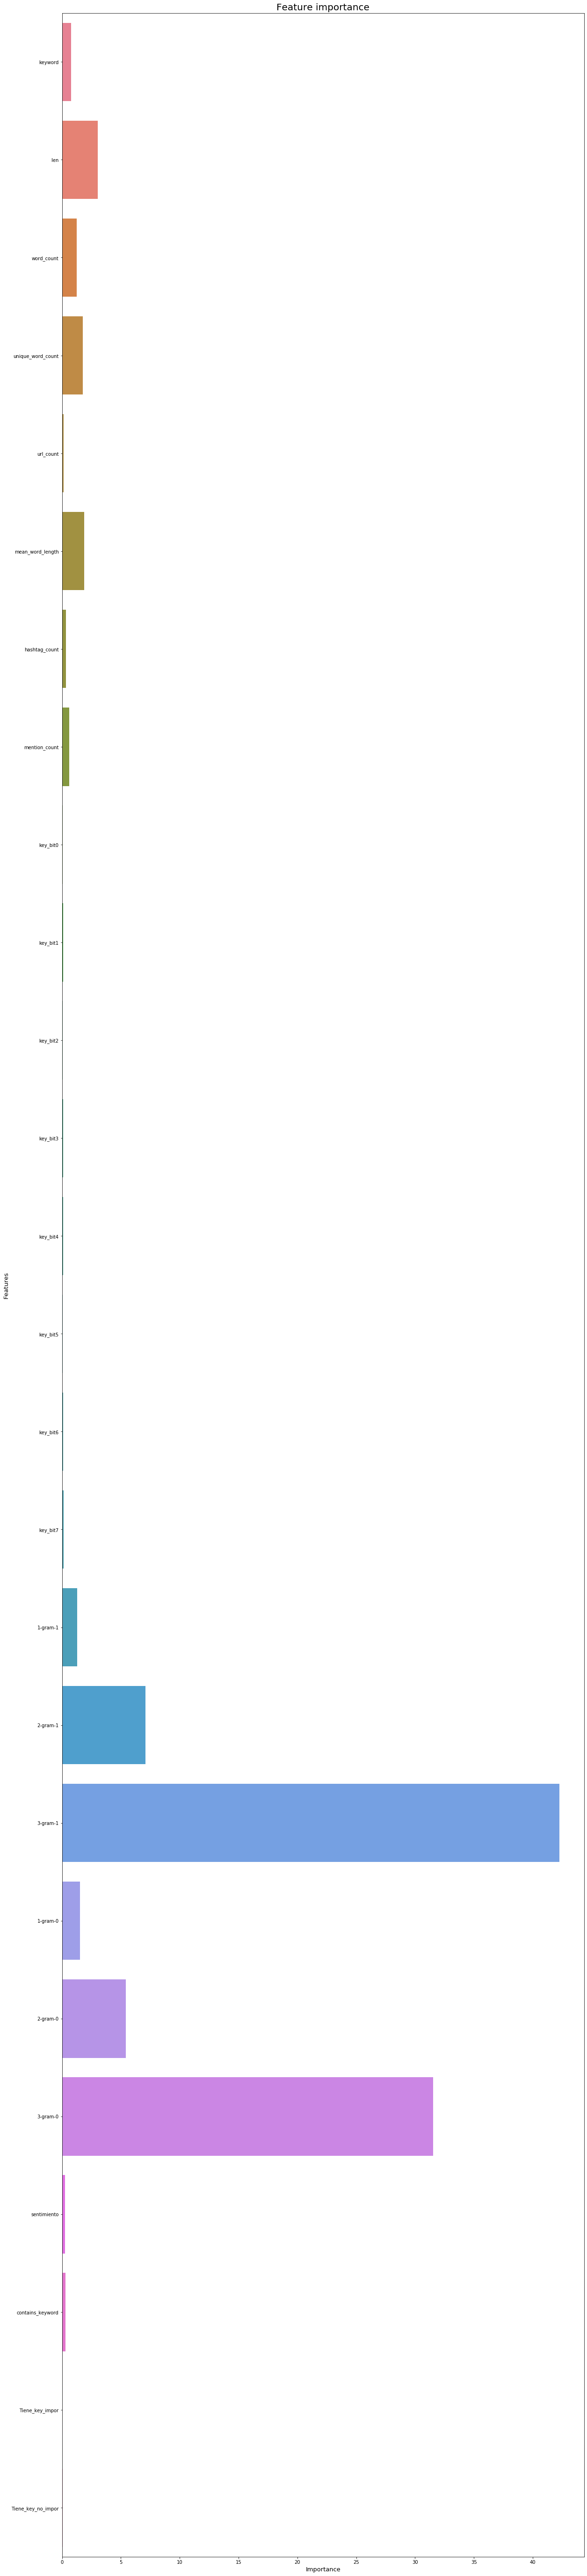

In [40]:
plt.rcParams['figure.figsize'] = [20, 100]
g= sns.barplot(y=y_ , x=model.feature_importances_ , orient='h',palette='husl')
g.set_xlabel("Importance", fontsize=13)
g.set_ylabel("Features", fontsize=13,)
g.set_title("Feature importance", fontsize=20)

In [41]:
#for x in range(len(list(x_train.columns))):
 #   if (x in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,19,25,26,27,35,37,40,42,48,50,52,54,55,56,58,68,75,78,82,83,85,87,92,96,103,105,108,112,116,120,127,132,135,136139,141,145,150,156,157,161,163,166,167,169,170,174,176,178,182,193,195,196,198,200,201,204,210,216,219,221,223,225,226,245,246,251,257,258,259,261,263,264,265]):
  #      print (list(x_train.columns)[x])
    

### Test

In [42]:
evaluate(model,x_train, y_train, x_test, y_test)

Entrenamiento: 98.8013%
Testeo: 97.1766%.
F1 Score:  0.9717662508207485
F1 Score:  0.49573210768220616


### Predecir

In [43]:
best_predict = model.predict( to_predict )
comprobar(best_predict)

F1 Score:  0.7189702727551335


### Guardo Submission

In [96]:
result = submission_output(ids, best_predict,"Catboost con FI.csv")
result

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
5,12,0
6,21,1
7,22,0
8,27,0
9,29,0
